# IST 718 LAB 6

In [0]:
# !pip install fbprophet

In [0]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/Zip_Zhvi_SingleFamilyResidence.csv', encoding='latin')

## PART ONE: Arkansas Metro Areas

In [0]:
hs = df[df['Metro'].str.contains('Hot Springs', na=False)]
lr = df[df['Metro'].str.contains('Little Rock', na=False)]
f = df[df['Metro'].str.contains('Fayetteville', na=False)]
s = df[df['Metro'].str.contains('Searcy', na=False)]

In [0]:
def graph_prices_for(df, location_name):
  df_t = df.loc[:, '1996-04'::].T
  df_t['avg'] = df_t.mean(numeric_only=True, axis=1)
  df_t.reset_index(inplace=True)
  columns = ['index', 'avg']
  df = pd.DataFrame(df_t, columns = columns)
  df = df.rename(index=str, columns={"avg": "y", "index": "ds"})
  ax = df.set_index('ds').plot(figsize=(12, 8))
  ax.set_ylabel('Home Prices in ' + location_name)
  ax.set_xlabel('Date')
  plt.show()

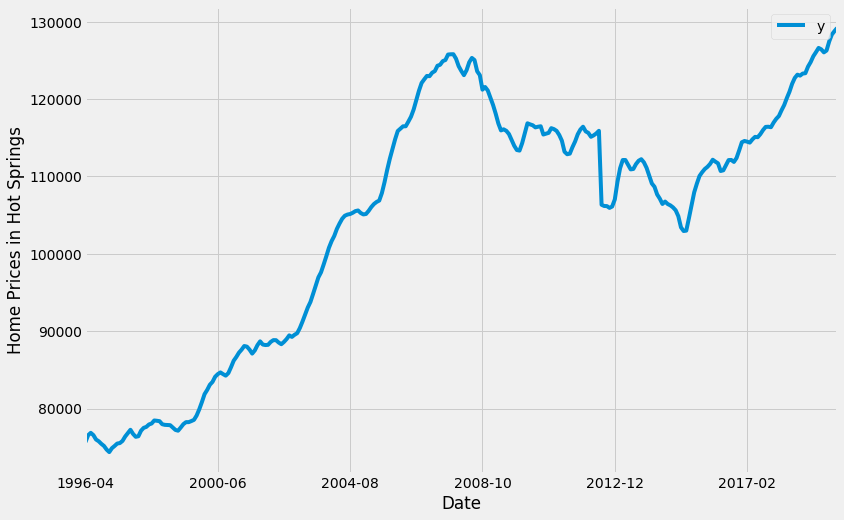

In [12]:
graph_prices_for(hs, "Hot Springs")

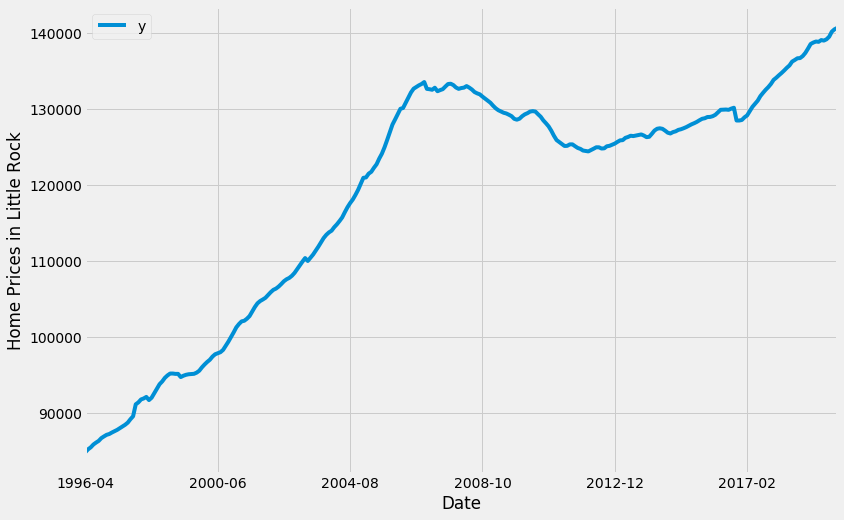

In [13]:
graph_prices_for(lr, "Little Rock")

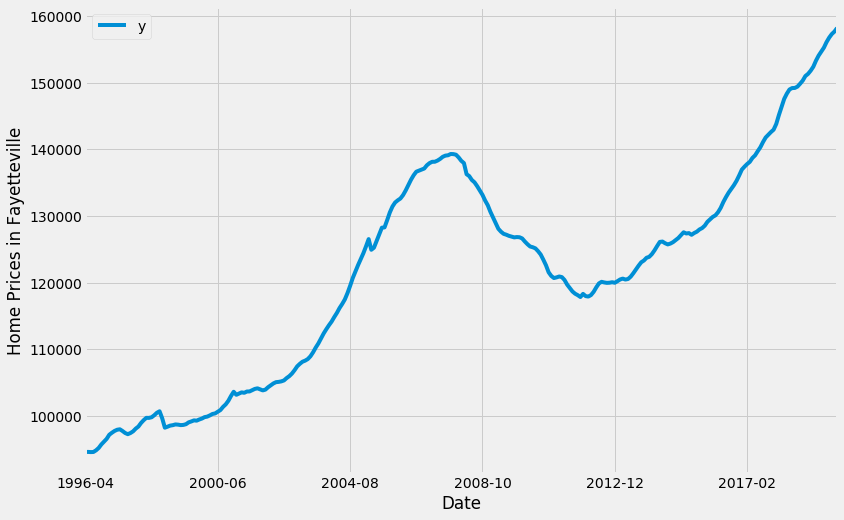

In [14]:
graph_prices_for(f, "Fayetteville")

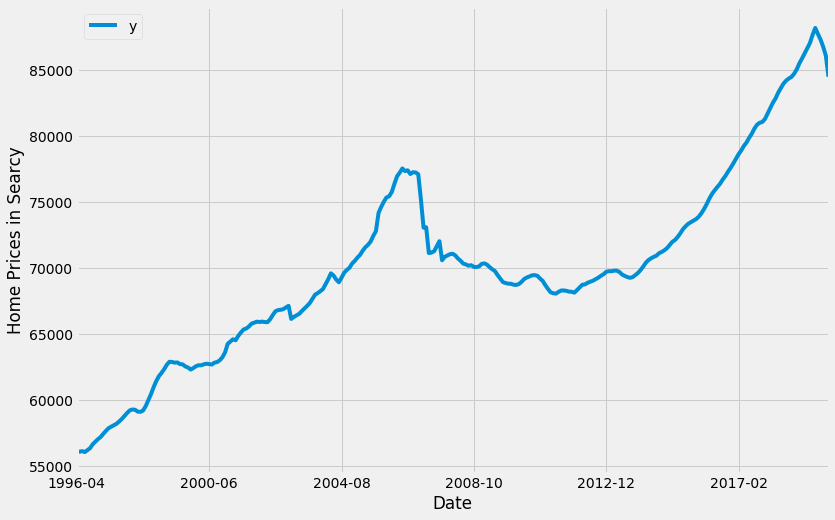

In [15]:
graph_prices_for(s, "Searcy")

In [0]:
def transform(df, location_name):
  df_t = df.loc[:, '1996-04'::].T
  df_t['avg'] = df_t.mean(numeric_only=True, axis=1)
  df_t.reset_index(inplace=True)
  columns = ['index', 'avg']
  df = pd.DataFrame(df_t, columns = columns)
  df['place'] = location_name
  return df

In [0]:
hs_t = transform(hs, 'Hot Springs')
lr_t = transform(lr, 'Little Rock')
f_t = transform(f, 'Fayetteville')
s_t = transform(s, 'Searcy')

In [0]:
big_df = hs_t.append([lr_t,f_t,s_t])

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

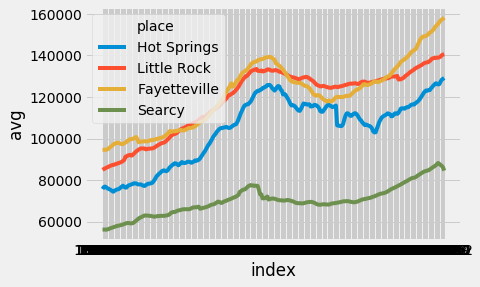

In [39]:
import seaborn as sns
sns.lineplot(x="index", y="avg", hue="place", data=big_df)

In [59]:
big_df['year'] = big_df.apply(lambda x: x['index'].split('-')[0], axis=1)
big_df['month'] = big_df.apply(lambda x: x['index'].split('-')[1], axis=1)
big_df['day'] = '01'
big_df['Date'] = pd.to_datetime(big_df[['year','month','day']])

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning:

The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.



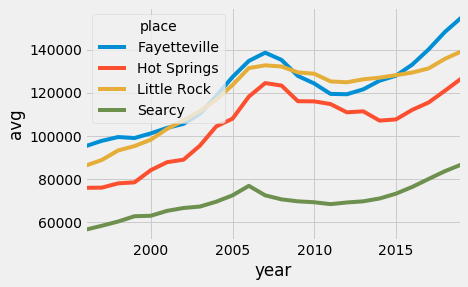

In [60]:
by_place = pd.DataFrame(big_df_year.groupby(['place','year'])['avg'].mean())
by_place.reset_index(inplace=True)
sns.tsplot(data=by_place, time="year", condition="place", unit="place", value="avg")

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning:

The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.



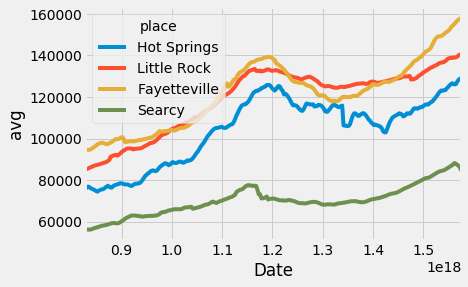

In [61]:
sns.tsplot(data=big_df, time="Date", condition="place", unit="place", value="avg")